  
# COGS 118A Group 9 - Final Project
    
# Wine quality Prediction Model

## Group members

- Ellie Zou
- Qiqing Li
- Walter Qiu
- Yaosen Zhang
- Yutao Ye

# Abstract 

In this project, we are going to build a supervised machine learning model to predict human wine taste preferences based on a list of physicochemical components in the wine. We will use the Wine Quality Data Set from the UCI Machine Learning Repository, which containes 6497 red and white vinho verde wine samples with their 11 kinds of physicochemical ingredients from analytical tests, acidity and density for example. This dataset also includes the taste quality scores for each wine from experts professional in tasting wines, which will be used as the label/output variables in our approach. To solve this classification problem, we will try different methods such as a K-nearest neighbor classifier, multi-class classification variants of SVM,  a decision tree classifier, a random forest classifier and a multi-layer perceptron classifier. Our evalutation metrics for the final model will be based on intermedidate loss and accuracy measurements and general, F1 score and ROC-AUC score.

# Background

Wine is an alcohol drink made from fermentated grapes and is one of the longest processed beverages in human drinking history. According to the Gomberg Fredrikson Report, government tax paid data shows that wine sales rises 16.8% in 2021 over 2020 and the total wine sales in 2021, including domestic and imported wine were $78.4 billion <a name="wine_trend"></a>[<sup>[1]</sup>](#Liz). This had indicated a hot trend in purchasing wines in present and near future. Though we are not very concerned with the stimulus behind this phenomenon, we are curious about what produce a tasty wine in terms of its physical and chemical components. A paper published in 2022 showed that numerous chemical components such as volatile and nonvolatitle compounds can potentially affect the flavor of white wines <a name="chemical"></a>[<sup>[2]</sup>](#Han). Hence, if we can determine what chemical constituents contribute more to a good flavor by machine learning techniques and numerical analysis, we may help guide people to choose good-tasting wines by inspecting their ingredients.

Meanwhile, there is a market that sells counterfeit wines of poor quality. The pandemic increases the occurence of fraudulent wines due to travel restrictions, shutdowns, and even layoffs throughout industry channels<a name="fraud_wine"></a>[<sup>[3]</sup>](#Lana). We can possibly help customers distinguish a fake wine, if we are able to identify the quality of the good wine, which is more likely to be real.

# Problem Statement

Flavor variations occur due to the presence of different chemicals in different wines under various conditions. Manipulating these variables can result in a wine with a better flavor profile. Variability and noise play an important role when understanding a situation like this, and statistical models are very effective at identifying key inputs from seemingly utterly chaotic data. This project details how wine tasting data and powerful modeling techniques provide insight into a set of variables that are important to an experienced group. Therefore, we aim to study potential influencing factors affecting wine quality through various classification models to determine whether there is a clear correlation between these potential factors and quality changes.

# Data

###  Basic Description
Our dataset is the [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality) from UCI Machine Learning Repository. The dataset contains 1599 and 4898 samples of the red and white variants of the Portuguese "Vinho Verde" wine, respectively. For each sample, there are corresponding 11 input variables based on objective tests (e.g. PH values) and an output variable based on sensory data from the median of at least 3 evaluations made by wine experts, with each expert graded the wine quality between 0 (very bad) and 10 (very excellent). We will use the given physicochemical variables as our input features and the quality scores as the output label. Meanwhile, we treat the wine type (red/white) as an extra input variable. However, since our dataset contains less than 7000 samples, it may not be sufficiently large given that we have more than 10 variables. Meanwhile, the data of wines was collected at 2009, which is potentially outdated. Also, wine tastes vary from person to person, and the scores from the experts may not reflect a general fact. Here are the 12 input feature variables and 1 output variable:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- type of wine (white or red) 
- quality (score between 0 to 10, output variable)

###  Packages Setup

In [111]:
import numpy as np
import pandas as pd

# Utilities
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Basic classifier models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

###  Data Cleaning

We begin by reading our data frame and split it into separate columns with the variable names.

In [2]:
# Read data frame
red_wine_data = pd.read_csv("data/winequality-red.csv") # red wine data
white_wine_data = pd.read_csv("data/winequality-white.csv") # white wine data

# Split and rename columns
new_columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
              'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
red_wine_data[new_columns] = red_wine_data[red_wine_data.columns[0]].str.split(';', expand=True)
red_wine_data = red_wine_data.drop(columns=red_wine_data.columns[0])

new_columns2 = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
              'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
white_wine_data[new_columns2] = white_wine_data[white_wine_data.columns[0]].str.split(';', expand=True)
white_wine_data = white_wine_data.drop(columns=white_wine_data.columns[0])

Here we show 5 random samples in the white wine dataset.

In [7]:
white_wine_data.sample(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1112,6.5,0.22,0.34,12,0.053,55,177,0.9983,3.52,0.44,9.9,6
3686,7.6,0.3,0.37,1.6,0.087,27,177,0.99438,3.09,0.5,9.8,5
4576,5.9,0.3,0.29,1.1,0.036,23,56,0.9904,3.19,0.38,11.3,5
2919,6.4,0.16,0.32,8.75,0.038,38,118,0.99449,3.19,0.41,10.7,5
1140,8.5,0.16,0.33,1,0.076,17,57,0.9921,3.14,0.46,10.6,6


### Exploratory Data Analysis

We first show the statisctics about the white wine data. Notice for the white wine data, Notice the highest quality score is 9 and the lowest is 3. This exposes to us to a 7-class classification problem.

In [8]:
# White wine
for i in range(len(white_wine_data.columns)):
    white_wine_data[white_wine_data.columns[i]] = pd.to_numeric(white_wine_data[white_wine_data.columns[i]])
    if i == len(white_wine_data.columns)-1:
        white_wine_data[white_wine_data.columns[i]].astype(int)
white_wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Now, we plot the frequency distribution of each variables for the white wine dataset. It can be observed that residual_sugar, sulphates, and alcohol distributions are highly right-skewed while the distribution of pH is likely normal.

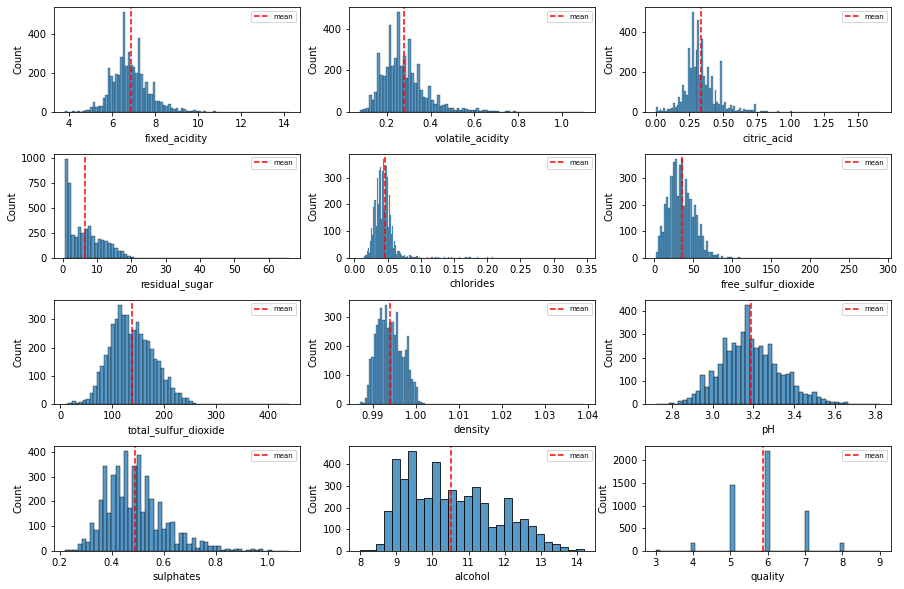

In [9]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
for i in range(4):
    for j in range(3):
        #if 3*i+j == 11:
            #break
        col = white_wine_data.columns[3*i+j]
        sns.histplot(white_wine_data[col], ax=ax[i,j])
        ax[i,j].axvline(x=(white_wine_data[col]).mean(), color='red', ls='--', label='mean')
        ax[i,j].legend(fontsize=7)
#ax[3,2].remove()
plt.subplots_adjust(wspace=0.2, hspace=0.4)

Below is the probability density distribution of all the input variables for different output labels (qualities). We are using the kernel density estimate (KDE) plot and notice that for some plots we have values in the y-axis greater than 1 but still having the area under any distribution curve to be 1.

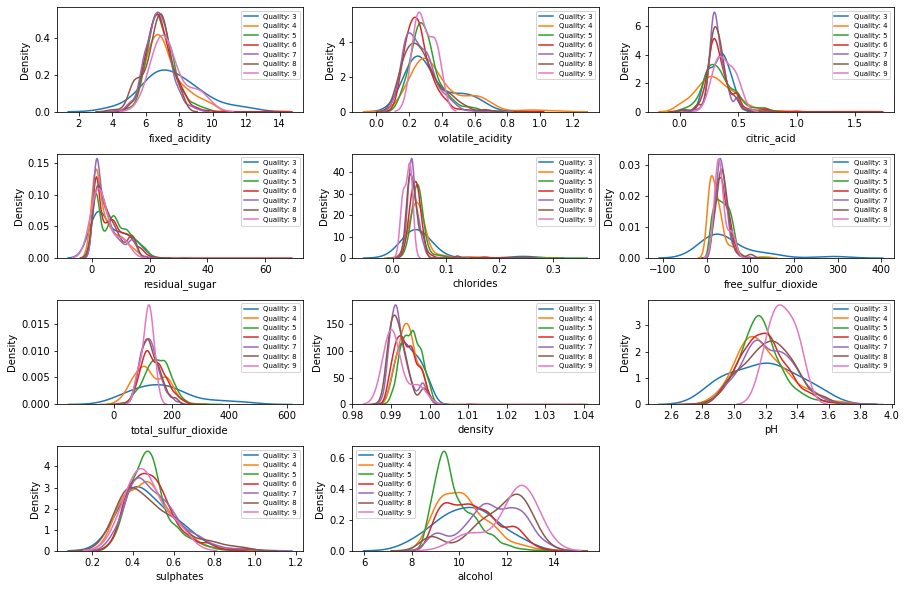

In [10]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
for i in range(4):
    for j in range(3):
        if 3*i+j == 11:
            break
        col = white_wine_data.columns[3*i+j]
        for k in range(3,10):
            sns.kdeplot(white_wine_data[col][white_wine_data['quality'] == k], ax=ax[i,j], label= 'Quality: {:}'.format(k))
            ax[i,j].legend(fontsize=7)
ax[3,2].remove()
plt.subplots_adjust(wspace=0.2, hspace=0.4)

Here are the correlations of each pair of the input variables. We are mostly concerned about the dependency of Quality with the other varaibles.

In [11]:
white_wine_data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


# Proposed Solution

Our primary goal is to predict the quality score of the wines in the test dataset and this is basically a multi-class classification problem (score 3 to 9). We propose the following algorithms to generate several models to find the best candidate solution.

### K-Nearest Neighbor Classifier

This classifier compare a data point with the nearest k data points in the training set and assign the label of the majority to it. We choose this model as our baseline since it is the simplest and involves the least hyper-parameters.

### Support Vector Classifier

This classifier finds the hyperplane that maximizes the separation of two classes using a decision boundary with margins. Since the native SVM only works for binary classification problem, we will use the "one vs rest" approach to use 7 SVM classifiers for each pair of one class and the rest. Another possible approach is "one vs one" where it is required to draw decision boundaries between each pair of two classies. Since "one vs rest" requires $k$ classifiers where k is the number of classes and "one vs one" requires $\frac{k(k-1)}{2} $classifier, we only consider the former approach for efficiency.

### Decision Tree Classifier

This classifier builds a tree model from a sequence of conditions and decisions in order to separate the data into classifiable portions. Each node in the tree will have the children so that the information gain is maximized. The leaf nodes will be purely assigned to only one label in our dataset.

### Random Forest Classifier

This classifier takes advantage of the ensemble technique by building a set of decision trees and generate its predicted label according to the majority vote rule. Each decision tree is trained on a random subset of the whole training dataset, and a random subset of the features is chosen at each split with the size usually being the square root of the number of features (and should be 3 in our case). We expect this classifier can have better performance than a singel decision tree.

### Benchmark

We will compare the performance of some our best-selected models with that of the models from the solution published on Kaggle by Jakub Zenon Kujawa<a name="benchmark"></a>[<sup>[4]</sup>](#Kujawa). He used oversampling to get a more trust-worthy model. After cross-validation and hyper-parameter tuning, his k-nearest neighbor classifier, decision tree classifier and random forest classifier attained an average accuracy of 87.52%, 88.56% and 90.67%, respectively. Though we will not not use oversampling, which can potentially increase the performance of our models, we aim to reach comparative accuracies for the our counterparts.

# Evaluation Metrics

We will primarily use accuracy or averaged accuracy accross validation sets to get an intuitive sense of percentage of the correctly predicted quality score of wines in the test set. We may also use precision (all true positive divides by all predicted positives) to see what our test performance will be if we weighs more on lowering our false positive rate or recall (all true positive divides by false negatives and true positives) to see what our test performance will be if we weighs more on lowering our false negative rate. In the former case, we may want to avoid misclassifying a good wine and in the later case, we may want avoid being too confident to predict the correct quality score of a wine. Also, we want to check the balance metric of both precision and recall, f1 score, of our models.Because we are doing multi-class classification, we will use one vs rest confusion matrix and calculate an average mearsure of these metrics. In addition, we want to use the ROC-AUC score because it evaluates the performance of a model by taking into account the trade-off between false positives and false negatives.

# Model Selection

Our general procedure is to choose different base models and do hyper-parameter tuning in a grid search. The grid search is based on a 10-fold cross-validation and using accuracy as the metrics to choose the best model.

### Initial Settings

In [12]:
# Get input features and output labels
X, y = white_wine_data.drop(columns='quality'), white_wine_data['quality']

# Shuffle the raw data
X, y = shuffle(X, y, random_state=0)

# Generate training, and test dataset by using a ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# preprocssor pipeline
scaler = StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
preprocessor = Pipeline([("scaler", scaler), ("imputer", imp)])
preprocessor.fit_transform(X_train, y_train)

# specify the 5 * 5 repeated k-fold cross-validation type
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42) 

# metrics used in cross-validation
metrics = ['accuracy']

### K-Nearest Neighbor Classifier

In [ ]:
# Baisc model
knn = KNeighborsClassifier()

# hyper-parameters
params_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 10], 
    'weights': ['uniform', 'distance'], 
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Set up a grid search model, use 10-fold cross-validation
clf_knn = GridSearchCV(estimator=knn, cv=10, param_grid=params_knn, scoring=metrics, refit='accuracy', verbose=2)

# training and testing
clf_knn.fit(X_train, y_train)
acc_knn = clf_knn.score(X_test, y_test)

In [59]:
print('Final test accuracy: {:.2f}%.'.format(acc_knn * 100))
print("Best model parameters: ", clf_knn.best_params_)

Final test accuracy: 61.94%.
Best model parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [61]:
# Show the best five models with parameters
data_knn = pd.DataFrame(clf_knn.cv_results_)
data_knn_ = data_knn[['params', 'mean_test_accuracy', 'rank_test_accuracy']].sort_values('rank_test_accuracy')
pd.set_option('display.max_colwidth', None)
data_knn_[:5]

,params,mean_test_accuracy,rank_test_accuracy
45,"{'algorithm': 'kd_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}",0.604145,1
69,"{'algorithm': 'brute', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}",0.604145,1
21,"{'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}",0.604145,1
65,"{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.600059,4
17,"{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.600059,4


### Support Vector Classifier

In [ ]:
# Baisc model
svc = SVC(decision_function_shape='ovr') # one vs rest

# hyper-parameters
params_svc = {
    'C': [0.01, 0.1, 1.0], 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Set up a grid search model, use 10-fold cross-validation
clf_svc = GridSearchCV(estimator=svc, cv=10, param_grid=params_svc, scoring=metrics, refit='accuracy', verbose=2)

# training and testing
clf_svc.fit(X_train, y_train)
acc_svc = clf_svc.score(X_test, y_test)

In [40]:
print('Final test accuracy: {:.2f}%.'.format(acc_svc * 100))
print("Best model parameters: ", clf_svc.best_params_)

Final test accuracy: 53.47%.
Best model parameters:  {'C': 1.0, 'kernel': 'linear'}


In [25]:
# Show the best five models with parameters
data_svc = pd.DataFrame(clf_svc.cv_results_)
data_svc_ = data_svc[['params', 'mean_test_accuracy', 'rank_test_accuracy']].sort_values('rank_test_accuracy')
pd.set_option('display.max_colwidth', None)
data_svc_[:5]

,params,mean_test_accuracy,rank_test_accuracy
8,"{'C': 1.0, 'kernel': 'linear'}",0.519411,1
4,"{'C': 0.1, 'kernel': 'linear'}",0.518135,2
0,"{'C': 0.01, 'kernel': 'linear'}",0.498731,3
6,"{'C': 0.1, 'kernel': 'poly'}",0.448953,4
1,"{'C': 0.01, 'kernel': 'rbf'}",0.448698,5


### Decision Tree Classifier

In [ ]:
# Baisc model
dt = DecisionTreeClassifier()

# hyper-parameters
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2]
}

# Set up a grid search model, use 10-fold cross-validation
clf_dt = GridSearchCV(estimator=dt, cv=10, param_grid=params_dt, scoring=metrics, refit='accuracy', verbose=2)

# training and testing
clf_dt.fit(X_train, y_train)
acc_dt = clf_dt.score(X_test, y_test)

In [39]:
print('Final test accuracy: {:.2f}%.'.format(acc_dt * 100))
print("Best model parameters: ", clf_dt.best_params_)

Final test accuracy: 60.00%.
Best model parameters:  {'criterion': 'gini', 'min_samples_leaf': 1, 'splitter': 'best'}


In [32]:
# Show the best five models with parameters
data_dt = pd.DataFrame(clf_dt.cv_results_)
data_dt_ = data_dt[['params', 'mean_test_accuracy', 'rank_test_accuracy']].sort_values('rank_test_accuracy')
pd.set_option('display.max_colwidth', None)
data_dt_[:5]

,params,mean_test_accuracy,rank_test_accuracy
0,"{'criterion': 'gini', 'min_samples_leaf': 1, 'splitter': 'best'}",0.607463,1
4,"{'criterion': 'entropy', 'min_samples_leaf': 1, 'splitter': 'best'}",0.592918,2
5,"{'criterion': 'entropy', 'min_samples_leaf': 1, 'splitter': 'random'}",0.588329,3
1,"{'criterion': 'gini', 'min_samples_leaf': 1, 'splitter': 'random'}",0.586025,4
2,"{'criterion': 'gini', 'min_samples_leaf': 2, 'splitter': 'best'}",0.576323,5


### Random Forest Classifier

In [ ]:
# Baisc model
rf = RandomForestClassifier()

# hyper-parameters
params_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2]
}

# Set up a grid search model, use 10-fold cross-validation
clf_rf = GridSearchCV(estimator=rf, cv=10, param_grid=params_rf, scoring=metrics, refit='accuracy', verbose=2)

# training and testing
clf_rf.fit(X_train, y_train)
acc_rf = clf_rf.score(X_test, y_test)

In [38]:
print('Final test accuracy: {:.2f}%.'.format(acc_rf * 100))
print("Best model parameters: ", clf_rf.best_params_)

Final test accuracy: 69.80%.
Best model parameters:  {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 100}


In [37]:
# Show the best five models with parameters
data_rf = pd.DataFrame(clf_rf.cv_results_)
data_rf_ = data_rf[['params', 'mean_test_accuracy', 'rank_test_accuracy']].sort_values('rank_test_accuracy')
pd.set_option('display.max_colwidth', None)
data_rf_[:5]

,params,mean_test_accuracy,rank_test_accuracy
7,"{'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 100}",0.680204,1
1,"{'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 100}",0.677909,2
8,"{'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 200}",0.677399,3
10,"{'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 100}",0.676386,4
2,"{'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 200}",0.676127,5


### K-Nearest Neighbor Classifier Using Bagging

In [ ]:
# Basic bagging model using the best-trained knn classifier
clf_bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=10, p=1, weights='distance'))

# hyper-parameters
params_bag = {
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

# Set up a grid search model, use 10-fold cross-validation

clf_bag = GridSearchCV(estimator=clf_bag, cv=10, param_grid=params_bag, scoring=metrics, refit='accuracy', verbose=2)

# training and testing
clf_bag.fit(X_train, y_train)
acc_bag = clf_bag.score(X_test, y_test)

In [56]:
print('Final test accuracy: {:.2f}%.'.format(acc_bag * 100))
print("Best model parameters: ", clf_bag.best_params_)

Final test accuracy: 66.22%.
Best model parameters:  {'max_features': 0.5, 'max_samples': 1.0}


In [62]:
# Show the best five models with parameters
data_bag = pd.DataFrame(clf_bag.cv_results_)
data_bag_ = data_bag[['params', 'mean_test_accuracy', 'rank_test_accuracy']].sort_values('rank_test_accuracy')
pd.set_option('display.max_colwidth', None)
data_bag_[:5]

,params,mean_test_accuracy,rank_test_accuracy
2,"{'max_features': 0.5, 'max_samples': 1.0}",0.636311,1
1,"{'max_features': 0.5, 'max_samples': 0.8}",0.635792,2
5,"{'max_features': 0.8, 'max_samples': 1.0}",0.620478,3
4,"{'max_features': 0.8, 'max_samples': 0.8}",0.618445,4
0,"{'max_features': 0.5, 'max_samples': 0.5}",0.615884,5


### Comparision

In [93]:
# Accuracy comparision
best_acc = [acc_knn, acc_bag, acc_svc, acc_dt, acc_rf]
clfs_acc = pd.DataFrame([best_acc], columns=['K-nearest neighbor', 'K-nearest nieghbor with bagging', 
              'Support vector machine', 'Decision tree', 'Random forest'], index=['Accuracy (best model)'])
clfs_acc.style.format("{:.2%}")

,K-nearest neighbor,K-nearest nieghbor with bagging,Support vector machine,Decision tree,Random forest
Accuracy (best model),61.94%,66.22%,53.47%,60.00%,69.80%


Our best model is a random forest classifier.

# Other Metrics and Visualization

### Confusion matrices for each model

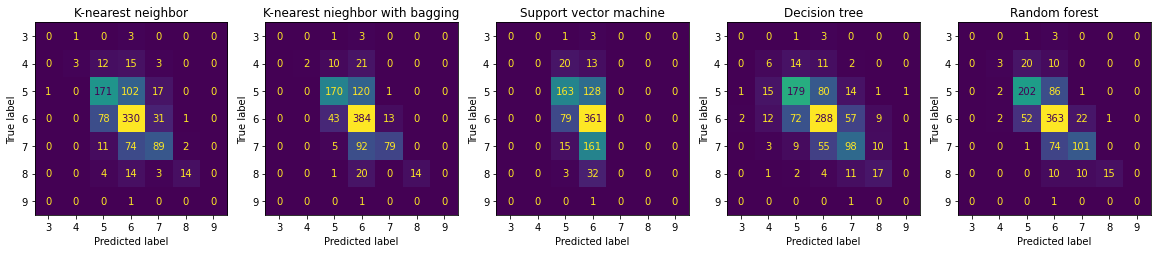

In [119]:
models = [clf_knn, clf_bag, clf_svc, clf_dt, clf_rf]
titles = ['K-nearest neighbor', 'K-nearest nieghbor with bagging', 
              'Support vector machine', 'Decision tree', 'Random forest']
_, ax_cm = plt.subplots(1, 5, figsize=(20,5))

for i in range(5):
    plot_confusion_matrix(models[i].best_estimator_, X_test, y_test, ax=ax_cm[i], colorbar=False);
    ax_cm[i].set_title(titles[i])

### Validation Curves across All Splits

Notice the curves is not expected to have any monotonical patterns since we are using cross-validation across different sets of parameters.

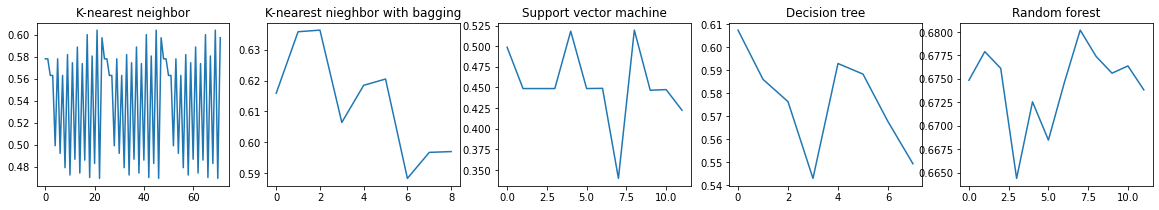

In [158]:
# indices of best set of parameters for each model
_param_idx_ = [45, 2, 8, 0, 7]
#print(clf_knn.cv_results_)
_, ax_tv = plt.subplots(1, 5, figsize=(20,3))
fig.subplots_adjust(wspace=0.5)
for i in range(5):
    _acc_ = models[i].cv_results_['mean_test_accuracy']
    ax_tv[i].set_title(titles[i])
    x = np.arange(len(_acc_))
    ax_tv[i].plot(x, _acc_)

### Validation Curve for Support Vector Classifier (Example)

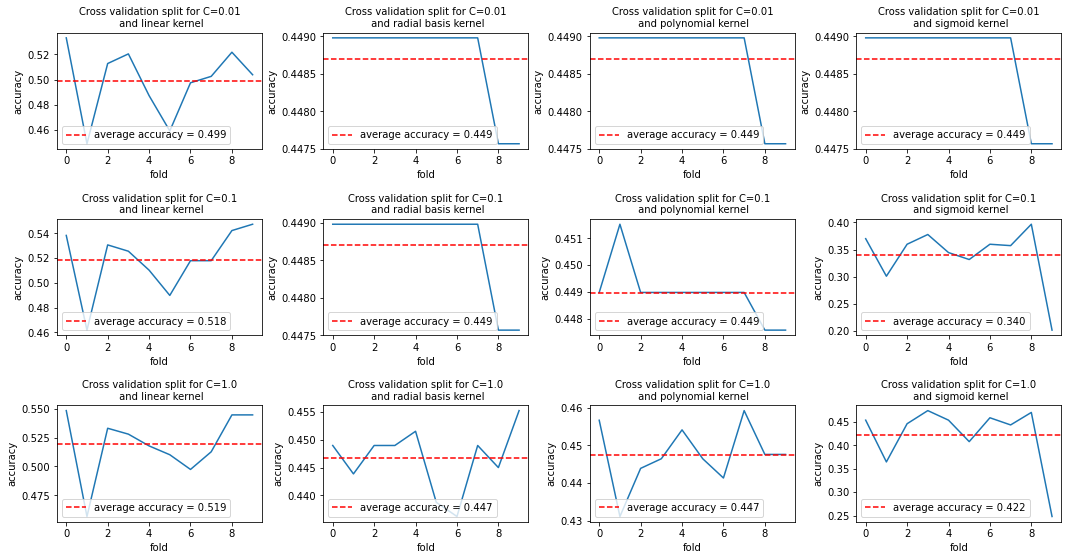

In [174]:
acc_list = np.zeros((10, 12))
for i in range(10):    
    acc_list[i] = clf_svc.cv_results_[f'split{i}_test_accuracy']
    
fig, ax_vc = plt.subplots(3, 4, figsize=(18, 9))
fig.subplots_adjust(wspace=0.3, hspace=0.6)
C = [0.01, 0.1, 1.0]
ker = ['linear', 'radial basis', 'polynomial', 'sigmoid']

for i in range(3):
    for j in range(4):
        ax_vc[i][j].plot(np.arange(10), acc_list[:, i*4+j])
        _mean_ = np.mean(acc_list[:, i*4+j])
        ax_vc[i][j].axhline(_mean_, color='red', ls='--', label=f'average accuracy = {_mean_:.3f}')
        ax_vc[i][j].set_title(f'Cross validation split for C={C[i]}\n and {ker[j]} kernel', fontsize=10)
        ax_vc[i][j].set_xlabel('fold')
        ax_vc[i][j].set_ylabel('accuracy')
        ax_vc[i][j].legend(loc='lower left')
plt.show()

# Results

Based on the cross-validation accuracies for each model, we find the <b>random forest classifier</b> is our best model, which attained an accuracy of <b>69.80%</b> on the test set, with the best set of hyperparameters being used are <b>entropy impurity measurement</b> for each tree split, <b>100 total trees</b> in the forset and <b>at least 1 sample required to be a leaf node</b> of a tree. We also have other random forest classifiers with 200 trees in each but this number of trees might have overcomplicated the models and not as good as using just 100 trees. However, using a minimum of 1 required sample in a leaf node seems to add complexity to our best model, though this is intuitionally more precise. Also, entropy as a measure of impurity works better than gini impurity as the later is measured from randomly chosen elements that may not be representitive.

When we use a single decision tree classifier, the best hyperparameters include gini impurity measure rather than entropy, thougth the difference is trivial and potentially due to systemtic inconsistency. Nevertheless, with the benefit of the bagging techique, random forest classifier is supremer than a decision tree classifier. Then, it is natural to come to the question that is we can use bagging to improve the performance of our second best model, k-nearest neighbor classifier. The last secion in Model Selection shows that the bagging approach increases the performance of a k-nearest neighbor classifier by nearly 4 percent, given that the a random forest improves from a decision tree by around 8 percent. 

With cross-validation, the final test accuracy is usually higher than the averaged validation accuracy for all trained models except the k-nearest neighbors classifier with bagging. This is possibly because the bagging technique can, while inprove the accuracy of the simple model, potentially loss some geenralization rate. From the validation curves, we notice that there are some patterns in those for the KNNs, KNNs with bagging, and SVCs but somewhat random in those for decision tree classifiers and random forest classifieres, suggesting that training tree models are more complicated and requires more carefulness in choosing the best parameters.

# Discussion

### Interpreting the result

For our multi-class classification problem, the best model is based on random forest and mostly because it is benefited from ensemble learning by combining the powerfulness of single decision trees. Meanwhile, a single decision tree is non-parametric, that is, it does not make assumptions of the distribution of our dataset. As we saw in the Exploratory Data Analysis section, some variables are neither evenly nor normally distributed, making it more proper to unweight the factor of their distribution. In addition, we have adjusted the complexity of our best random forest classifier by choosing the most balanced set of parameters which makes each decision tree split-wise complicated but reduce the number of 'votings' in ensemble learning.

### Limitations

We have more than 10 input variables but only around 5000 samples, we could have use techniques of oversample to create more of the samples. Also, the dataset is un-evenly distributed, having significant more samples of certain target values. The solution we proposed is limited by our knowledge and time, and we ruled out another great model -- deep neural network.

### Ethics & Privacy

Our data does not include any private infomation since the wines have no brand or company name attached, nor does it cause ethnic problem for all the scores are recored anonymously. However, the dataset was collected at 2009, and the wines nowadays might differ from those about 10 years ago. Nevertheless, we traced the data first from Kaggle, where it have been made public for years. Though wine tastes vary from person to person, we are not setting a standard but suggesting a model that can serve as a guidance of choosing good wines.

### Conclusion

In conclusion, we are able to predict the quality of a wine from its physicalchemical properties by building a model from a random forest classifier. Though somewhat worried about the generalization rate, we have gained confidence in selecting the best model through cross-validation and hyper-paramter tuning. Hoperfully in future, we will study more complex models with more advanced techiniques that can be applied to improve our current prediction model.

# Footnotes

<a name="wine_trend"></a>1.[^](#Liz): Thach M. W., Liz (2022, Oct 12). U.S. wine market sales up 16.8% in 2021, pointing towards hot wine trends in 2022. Forbes. Retrieved February 22, 2023, from https://www.forbes.com/sites/lizthach/2022/04/25/us-wine-market-sales-up-168-in-2021-pointing-towards-hot-wine-trends-in-2022/amp/<br>

<a name="chemical"></a>2.[^](#Han): Seongju Han, Jiyun Yang, Kapseong Choi, Juyoung Kim, Koushik Adhikari, and Jeehyun Lee (2022, Feb 20). Chemical Analysis of Commercial White Wines and Its Relationship with Consumer Acceptability. Retrieved March 08 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8871119/<br>

<a name="fraud_wine"></a>3.[^](#Lana): Bortolot, Lana (2021, Aug 19). Beyond high-profile scandals, wine fraud is rampant. SevenFifty Daily. Retrieved February 22, 2023, from https://daily.sevenfifty.com/beyond-high-profile-scandals-wine-fraud-is-rampant/<br> 

<a name="benchmark"></a>4.[^](#Kujawa): Jakub Zenon Kujawa (2023, Feb 02). Wine Quality Prediction. Retrieved March 08, 2023, from https://www.kaggle.com/code/jakubzenonkujawa/wine-quality-prediction